In [2]:
import pandas as pd

file = '../04_results/CATANDUANES/01_spatiotemporal/CATANDUANES_results.csv'

results = pd.read_csv(file, index_col="Unnamed: 0")

results.head()

,FID,Municipality,idarea,X,Date,n,base,typeI,typeII,typeIII,typeIV
1,0,BAGAMANOC,1,209,2021-01-01,0,0.569498,0.359049,0.146952,0.569388,0.569673
2,0,BAGAMANOC,1,210,2021-01-02,0,0.546808,0.349573,0.139945,0.546728,0.546617
3,0,BAGAMANOC,1,211,2021-01-03,0,0.503438,0.331799,0.115361,0.503420,0.503220
4,0,BAGAMANOC,1,212,2021-01-04,0,0.471864,0.317283,0.099527,0.471850,0.471770
5,0,BAGAMANOC,1,213,2021-01-05,0,0.446805,0.304690,0.113028,0.446827,0.446805


<Axes: >

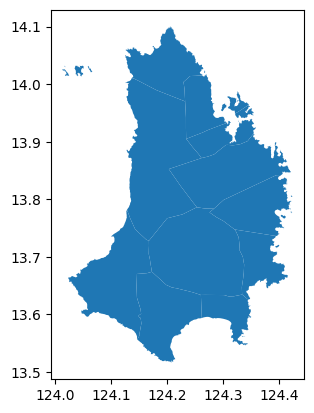

In [3]:
from matplotlib import pyplot as plt
import geopandas as gpd
import pyproj

sf = gpd.read_file("../01_data/00_raw/01_shapefiles/CATANDUANES/CATANDUANES_shapefile.shp")
sf.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
sf.plot()

In [8]:
import ipywidgets as widgets
from ipywidgets import interact
import time
import matplotlib.animation as animation

missingtypes = ['type1','type2','type3','type4']
typerist = ['typeI','typeII','typeIII', 'typeIV']

def plot_choropleth(ind):

    labels = [
        "BAGAMANOC", "BARAS", "BATO", "CARAMORAN", "GIGMOTO", "PANDAN", 
        "PANGANIBAN", "SAN ANDRES", "SAN MIGUEL", "VIGA", "VIRAC"
    ]
    date_values = results['Date'].unique().tolist()

    fig, ax = plt.subplots(1, figsize=(5,6))

    def update(frame):
        plt.clf()
        ax = plt.subplot(1, 1, 1)
        date_value = date_values[frame]
        filtered_dataframe = results[results['Date'] == date_value]
        typeI_values = []
        for i in range(len(labels)):
            typeI_values.append(results[(results['Date'] == date_value) & (results['Municipality'] == labels[i])][f'{typerist[ind]}'].values[0])

        df_merged = sf.merge(filtered_dataframe,left_on=['Labels'], right_on=['Municipality'])
        
        df_merged.plot(column=f'{typerist[ind]}', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', vmin=0, vmax=112, legend=True)
        plt.title(f'Type {ind+1}: {date_value}')
        for i, (geometry, typeI_val) in enumerate(zip(sf.geometry, typeI_values)):
            centroid = geometry.centroid
            ax.text(centroid.x, centroid.y, "{:.2f}".format(typeI_val), fontsize=10, ha='center', color='red')

        ax.axis('off')
    anim = animation.FuncAnimation(fig, update,frames=len(date_values), interval=100, repeat=False)
    anim.save(f'choropleth_animation_{missingtypes[ind]}.mp4', writer='ffmpeg')
    plt.close(fig)

#plot_choropleth(1)
#plot_choropleth(2)
#plot_choropleth(0)


for i in range(0,4):
    plot_choropleth(i)
# date = widgets.Dropdown(options=date_values)

# interact(plot_choropleth, date=date)